In [44]:
import numpy as np # library for numerical computations
import pandas as pd #  library used for data manipulation and analysis
import matplotlib.pyplot as plt #  library used for creating plots and visualizations
import seaborn as sns #another library for visualizations

%matplotlib inline
#to display plots within Colab Notebook

In [45]:
#read csv file containing sales data for wallmart stores
df = pd.read_csv("Sales Prediction for Food Retail.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [46]:
#there are 8523 instances and 12 attributes or variables
df.shape

(8523, 12)

In [47]:
data_types = df.dtypes  #to retrieve the data types of each column.
print(data_types)
#we have 7 categorical variables and 5 numerical variables including target variable 'Item_Outlet_Sales'

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [48]:
#Calculate the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)
#Calculate duplicated instances
print(df.duplicated().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
0


In [49]:
#part of initial EDA - to understand each attribute by data types and non-null values
df.info()
#oulet_size and Item_Weight have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [50]:
#obtaining the count, unique values, top value and frequency for categorical columns
#freq represents the frequency of the mode in respective column
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [51]:
import re
#replacing short forms and different casing categories with one general representative category

df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF', 'Low Fat').str.replace('reg', 'Regular').str.replace('low fat', 'Low Fat').astype(str)

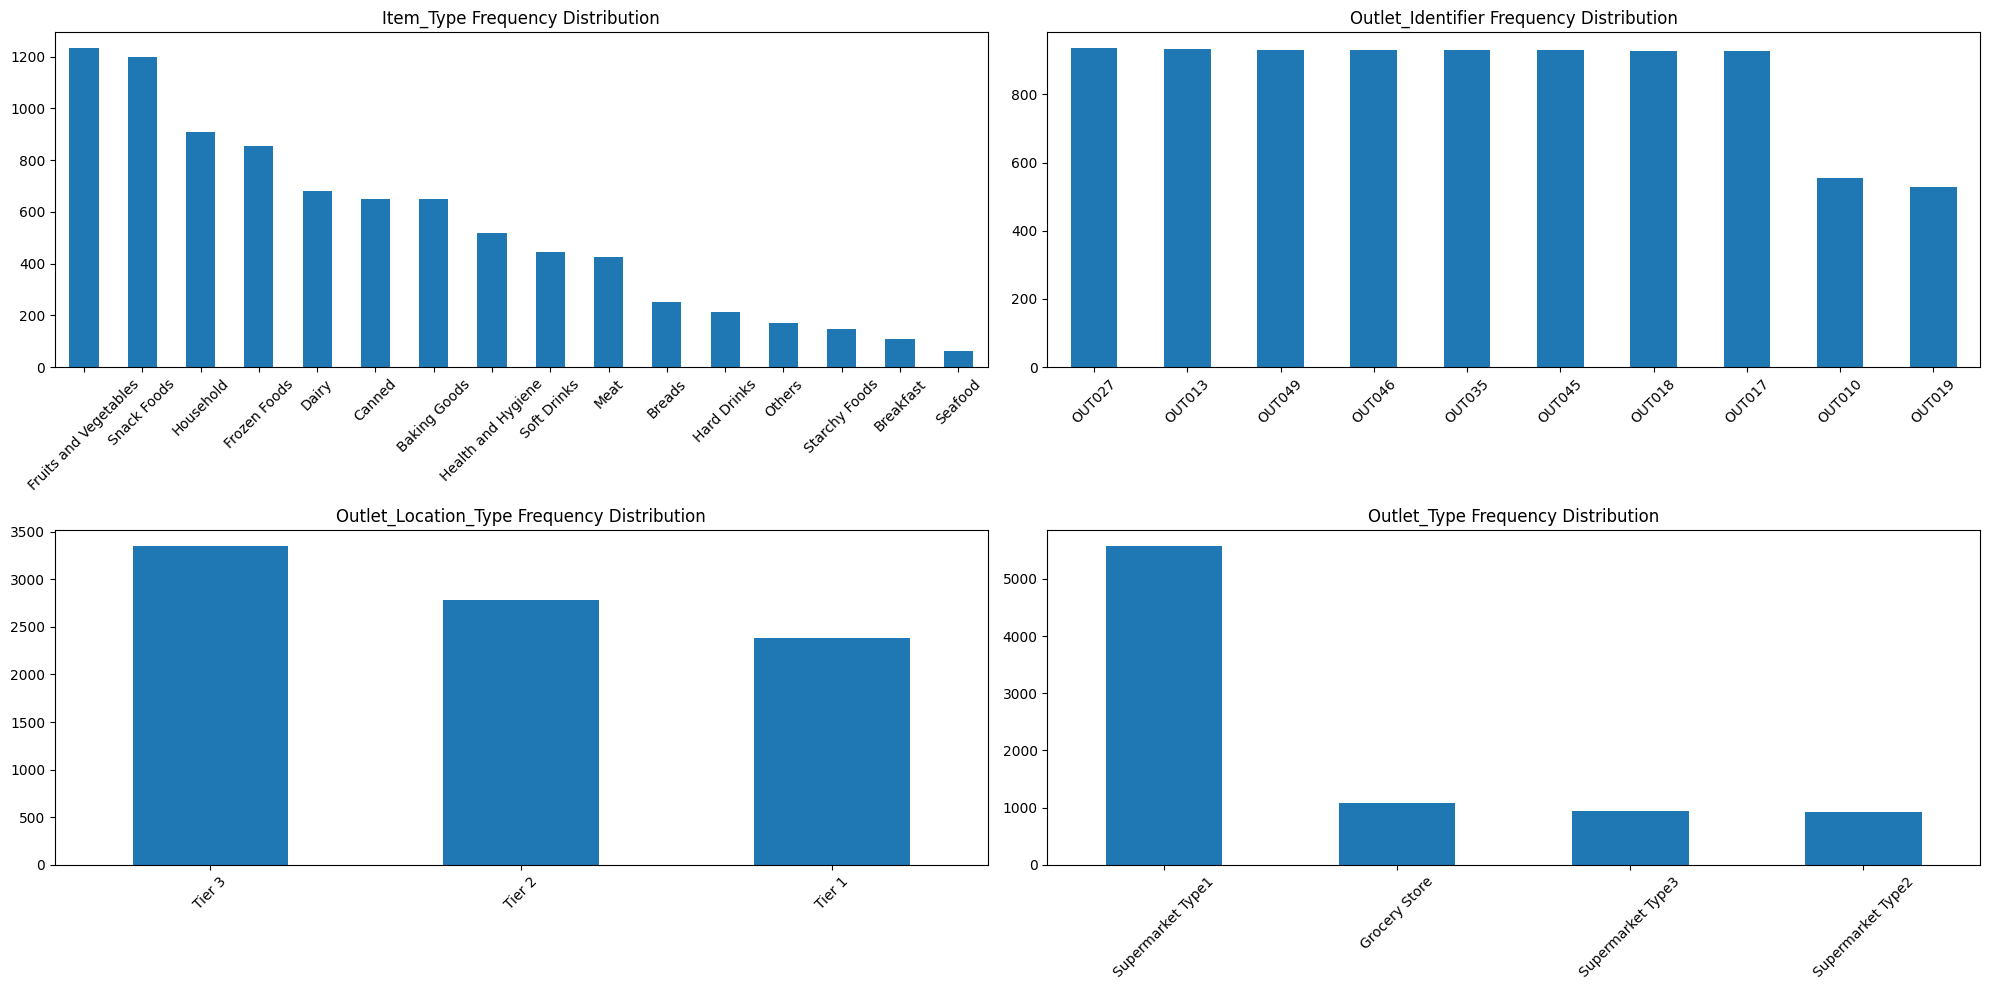

In [52]:
#seperating categorical variables in a list
categorical_vars = ['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']

# Setting up subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Flattening the subplot array for iteration
axes = axes.ravel()

for i, var in enumerate(categorical_vars):
    # Getting the value counts for the variable
    value_counts = df[var].value_counts()

    # Creating a bar plot for the variable
    value_counts.plot(kind='bar', ax=axes[i])

    # Setting the title for the subplot
    axes[i].set_title(f'{var} Frequency Distribution')

    # Rotating x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

# Adjusting the layout to prevent overlapping titles
plt.tight_layout()

# Displaying the subplots
plt.show()


In [53]:
#part of initial EDA - statistical descriptions for each numeric variable inn terms of measures of central tendency, standard deviation, etc
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Axes: >

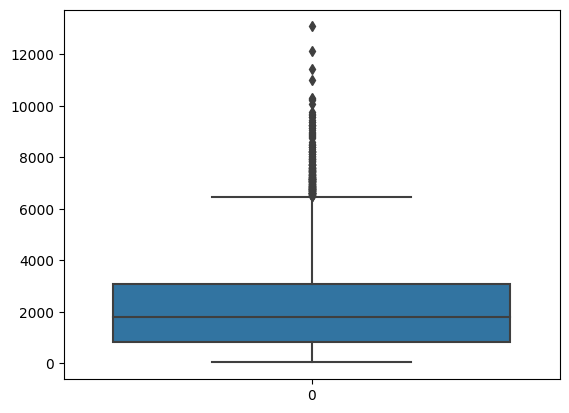

In [54]:
#plotting box plot to visualize outliers
sns.boxplot(df["Item_Outlet_Sales"])

In [55]:
def clean_and_plot_outliers(df, column_name):

    sorts = df[column_name].sort_values()

    # Calculating quartiles and IQR
    Q1 = sorts.quantile(0.25)
    Q3 = sorts.quantile(0.75)
    IQR = Q3 - Q1

    # Calculating upper and lower bounds for outliers
    upper = Q1 - 1.5 * IQR
    lower = Q3 + 1.5 * IQR

    # Filter out outliers
    clean_data = sorts[~((sorts < upper) | (sorts > lower))]

    # Creating a boxplot for the cleaned data
    sns.boxplot(clean_data)

    return clean_data

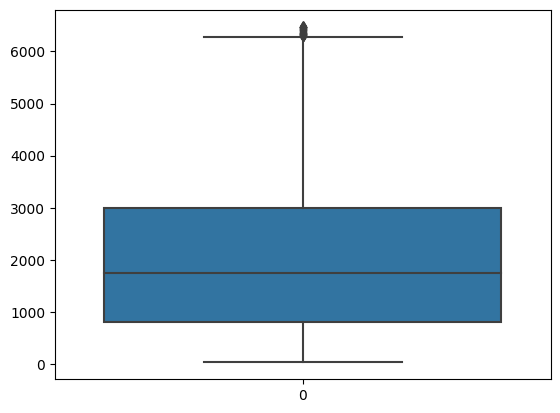

In [56]:
#after outlier removal
df['Item_Outlet_Sales'] = clean_and_plot_outliers(df, 'Item_Outlet_Sales')

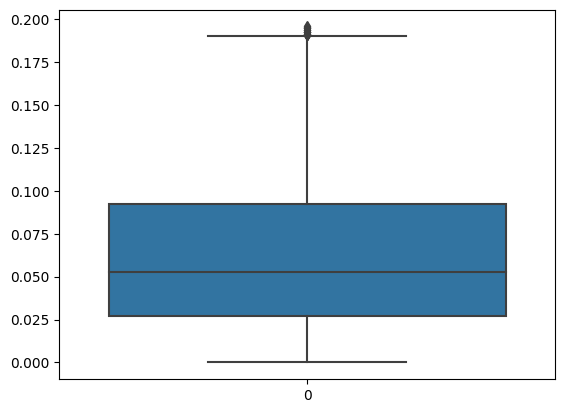

In [57]:
df['Item_Visibility'] = clean_and_plot_outliers(df, 'Item_Visibility')

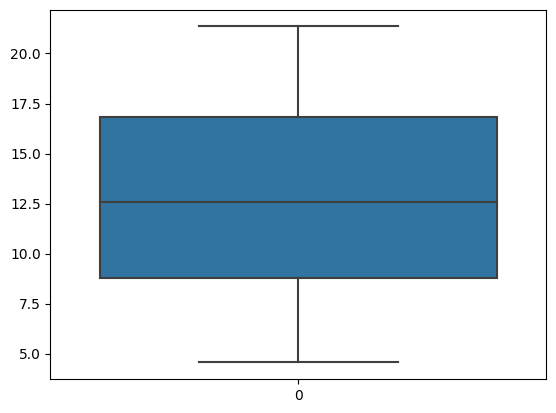

In [58]:
df['Item_Weight'] = clean_and_plot_outliers(df, 'Item_Weight')

In [59]:
#missing values increase after outlier removal, they have to be filled with mean again
missing_values = df.isnull().sum()
print(missing_values)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               144
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales             186
dtype: int64


In [60]:
#fill variables having missing values with mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Item_Visibility'].fillna(df['Item_Visibility'].mean(), inplace=True)
df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].mean(), inplace=True)

In [61]:
missing_values = df.isnull().sum()
print(missing_values)

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [62]:
#outlet_size is categorical and needs to be imputed with mode
#the mode = Medium
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [63]:
import re
#using replace function to replace NaN and nan cells with Medium
df['Outlet_Size'] = df['Outlet_Size'].str.replace('NaN', 'Medium').astype(str)
df['Outlet_Size'] = df['Outlet_Size'].str.replace('nan', 'Medium').astype(str)


In [64]:
missing_values = df.isnull().sum()
print(missing_values)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [65]:
#mean values change as outliers are removed
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.063061,140.992782,1997.831867,2059.362844
std,4.226124,0.045738,62.275067,8.371760,1489.573117
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.091097,185.643700,2004.000000,2960.812600
max,21.350000,0.195721,266.888400,2009.000000,6478.234000


Visualizing frequency distribution graphs for numerical variables to check for skewed distributions.

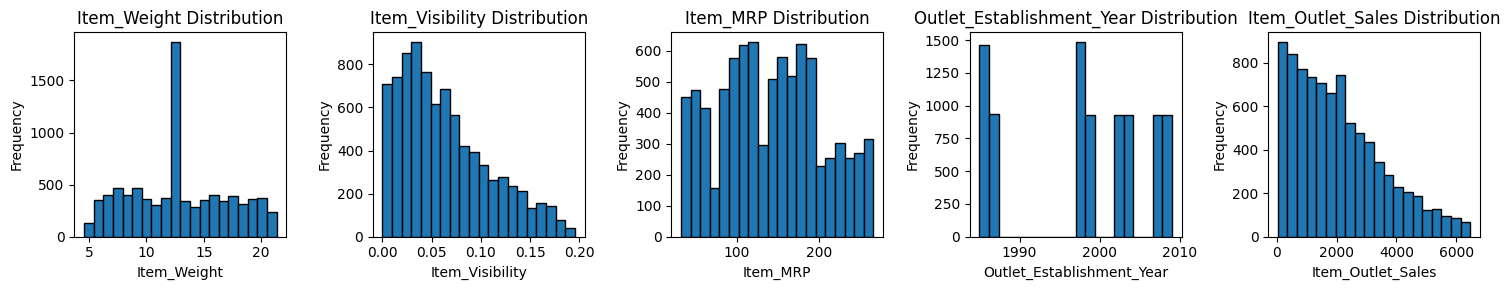

In [66]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Variable names for the subplots
variables = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

# Iterate through the subplots and variables
for i, var in enumerate(variables):
    axes[i].hist(df[var], bins=20, edgecolor='black')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{var} Distribution')

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

# Display the subplots
plt.show()

#item visibility and item sales are right skewed
#no variable has a perfect or near perfect normal distributions

Correlations between categorical variables and target variable are understood though bar plots and box plots visualizations.

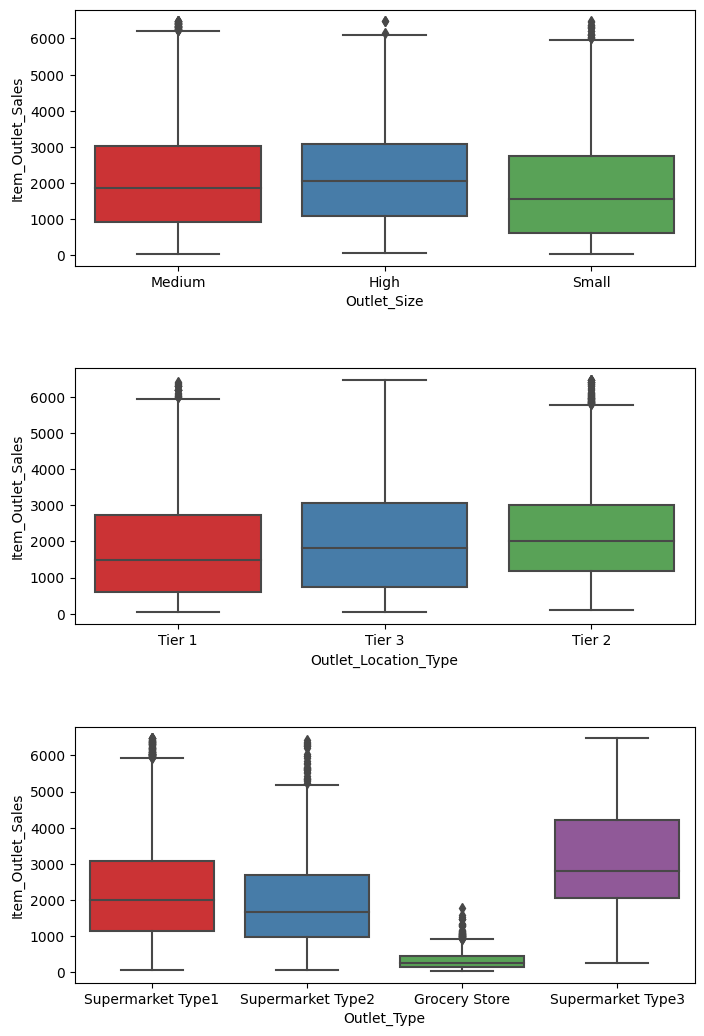

In [67]:
plt.figure(figsize = (8,7))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

Outlet Type and Item Outlet Sales are correlated more than Outlet Size or Outlet Location Type, for which there is not much difference for median sales.

In [68]:
sorted_data = df.sort_values(by='Item_Outlet_Sales')

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

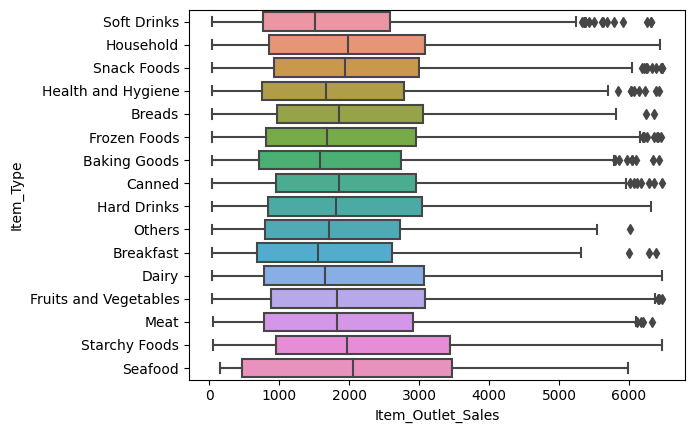

In [69]:
sns.boxplot(x='Item_Outlet_Sales', y='Item_Type', data=sorted_data, orient = 'h')

Sales for seafood, starchy food, meat and fruits and vegetable seems to be relatively high than rest.

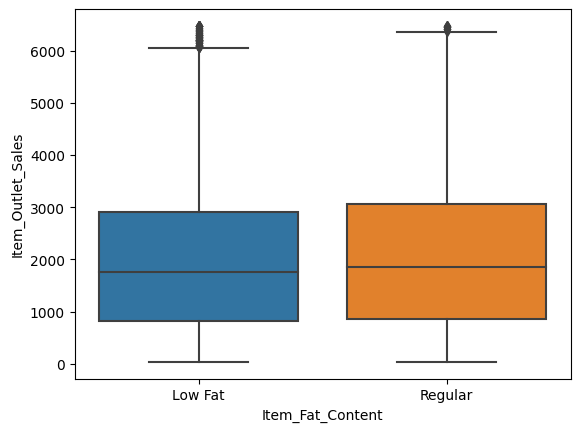

In [70]:
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)

plt.show()

In [71]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

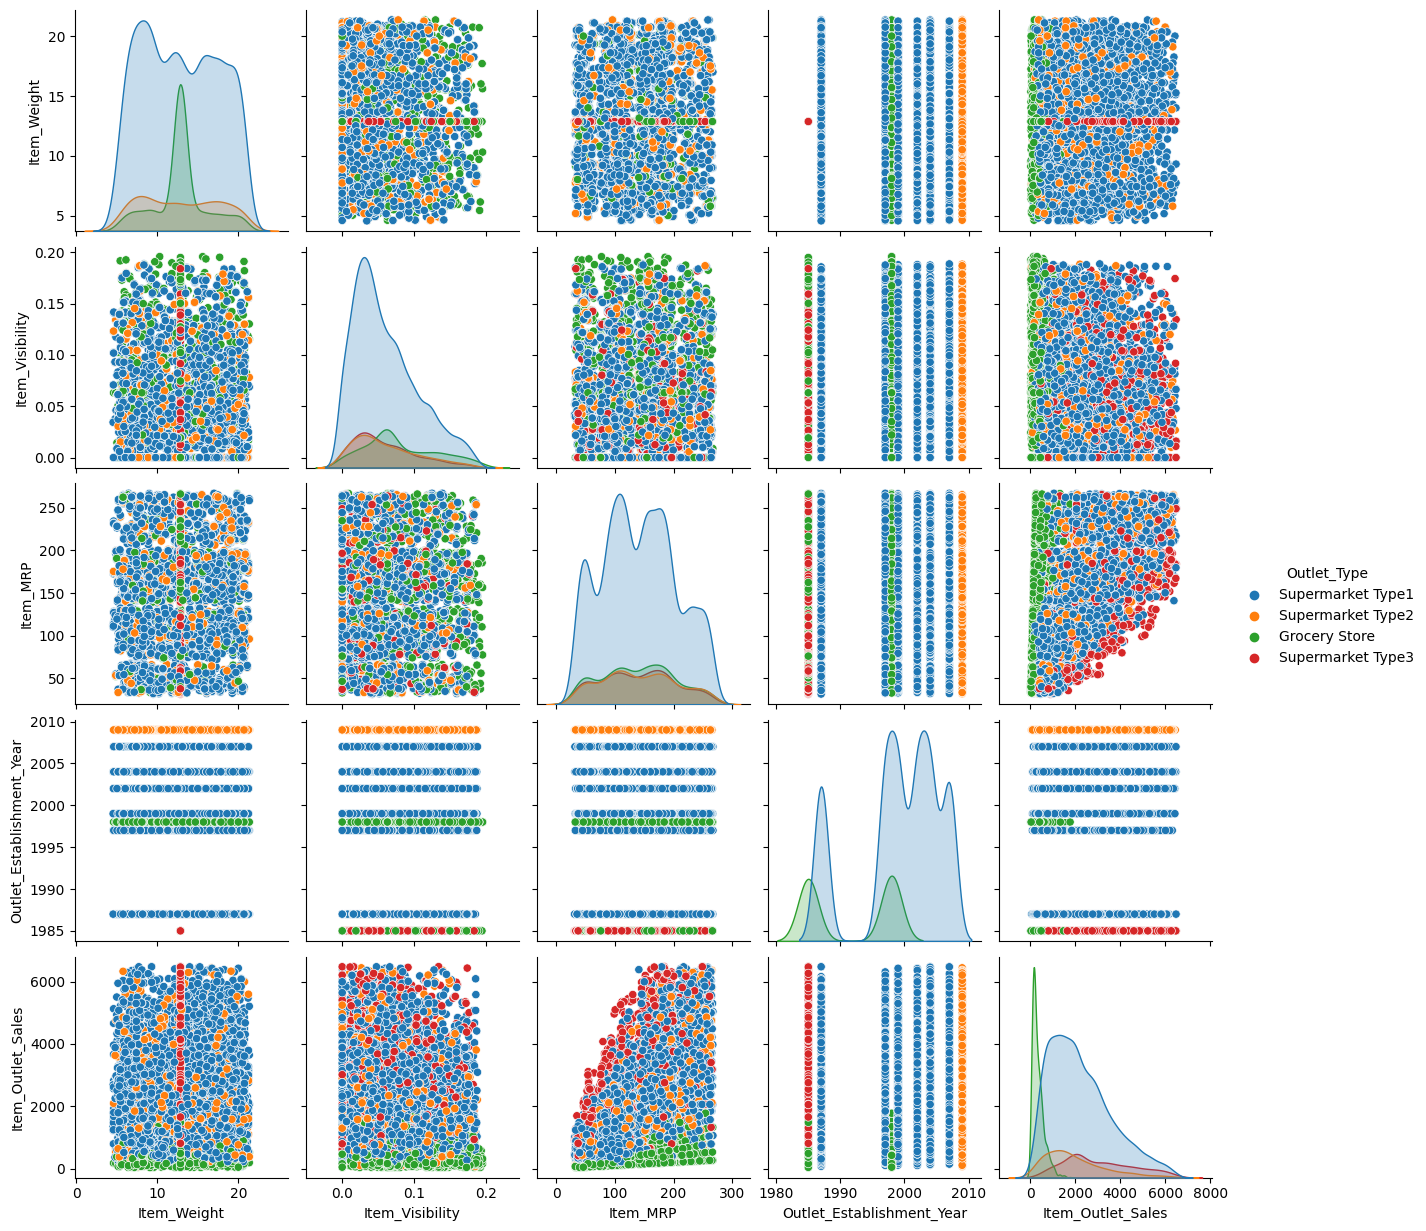

In [72]:
#pairplots can be used to visualize correlations and distributions for numeric variables
#hue parameter is used to include the two categorical variables seen to be important in previous steps
sns.pairplot(df, hue='Outlet_Type')

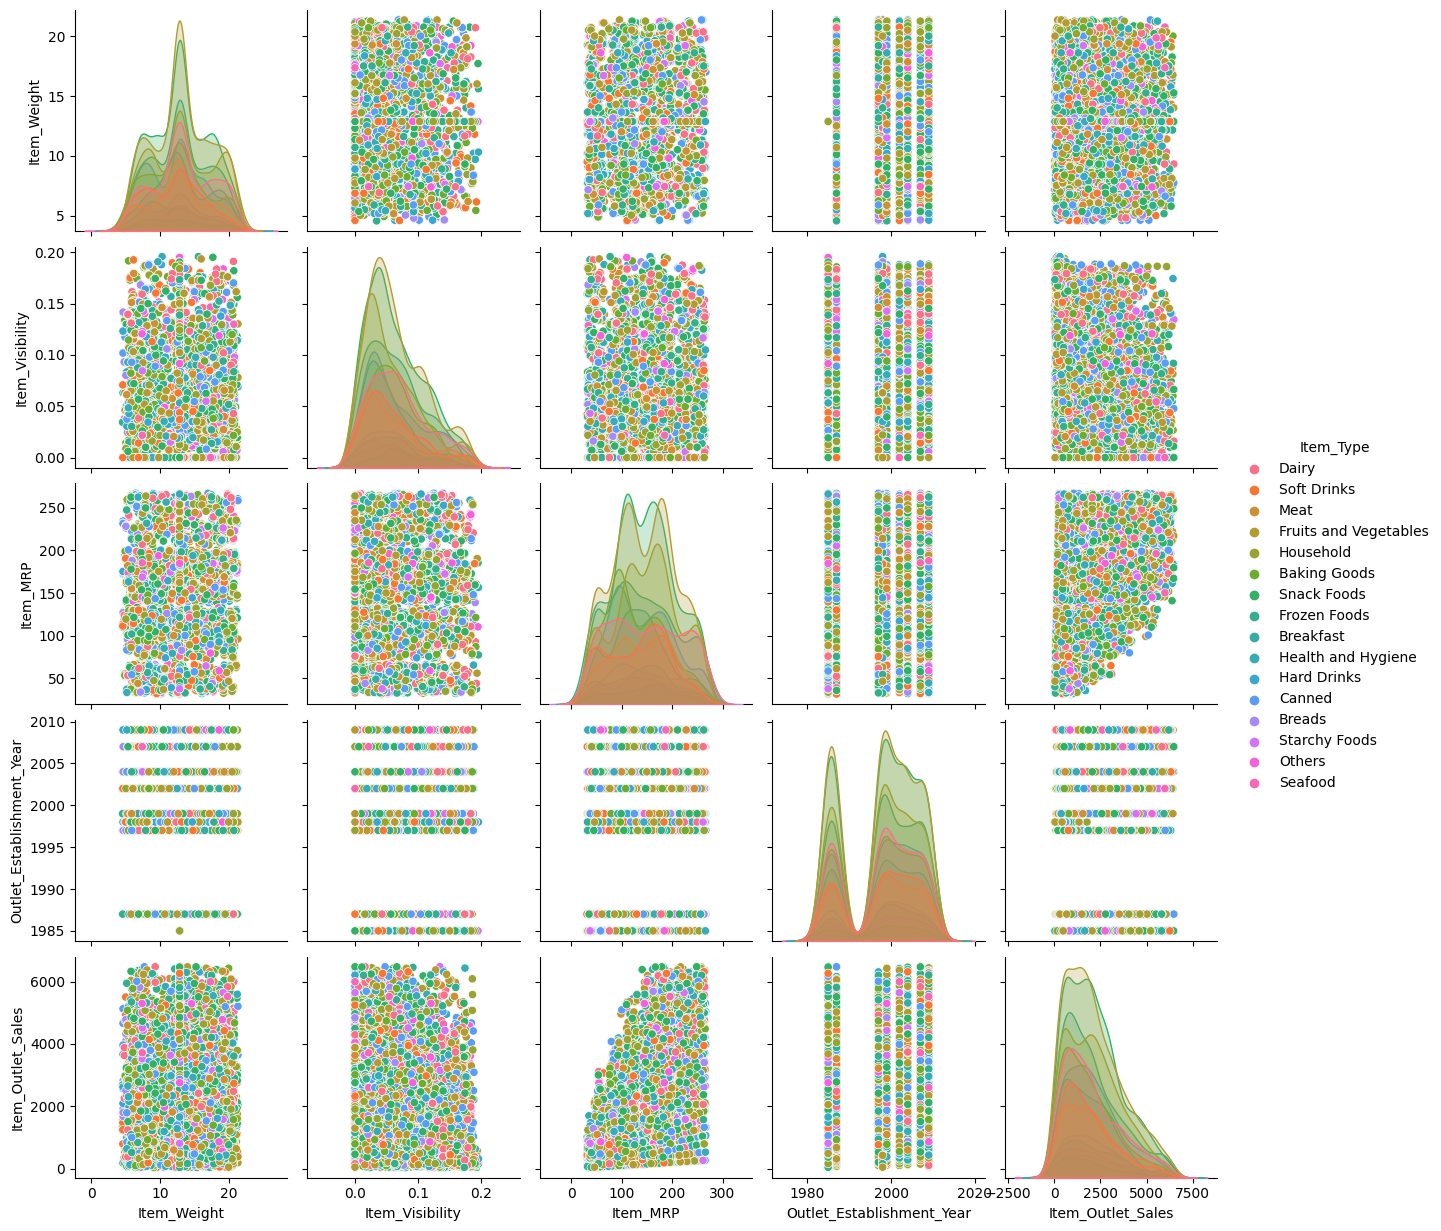

In [73]:
sns.pairplot(df, hue='Item_Type')

<ipython-input-74-60535baee127>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

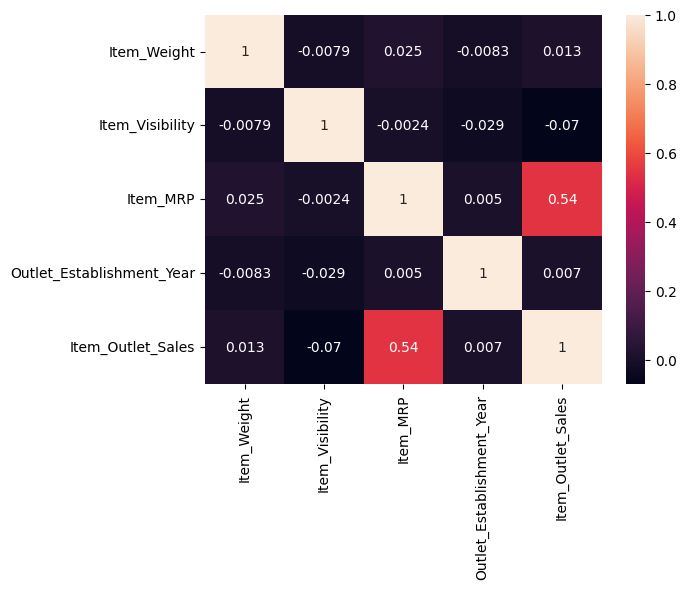

In [74]:
#correlation matrices can be visualized using heat maps
sns.heatmap(df.corr(), annot=True)
#theres moderate correlation between Item_MRP and Item_Outlet_Sales

In [75]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Handling categorical variables
# One-hot encoding
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(df[['Outlet_Type','Item_Type']])
# Get column names for the one-hot encoded DataFrame
df_one_hot = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(
    input_features=['Outlet_Type','Item_Type']))
result_df = pd.concat([df, df_one_hot], axis=1)

# Label encoding
label_encoder = LabelEncoder()
df_label = df.copy()
df_label['Outlet_Type'] = label_encoder.fit_transform(df['Outlet_Type'].fillna('Unknown'))
df_label['Item_Type'] = label_encoder.fit_transform(df['Item_Type'].fillna('Unknown'))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [76]:
result_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [77]:
result_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'],
      dtype='object')

In [78]:
df_label.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [79]:
features = ['Item_MRP','Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods']

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn as sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Split the data into features (X) and the target variable (y)
X = result_df[features]
y = result_df['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression class
lr_model = LinearRegression()

# Fit the model on the scaled training data
lr_model.fit(X_train, y_train)

# Predict the target variable for both training and testing sets
y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

# Create a DataFrame to store feature names and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})

# Display the coefficients
print(coef_df)

# Retrieve the intercept
intercept = lr_model.intercept_

# Display the training and testing accuracy metrics
train_r2 = r2_score(y_train, y_train_predict)
test_r2 = r2_score(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)

# Display the training and testing accuracy metrics
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("(MAE): %.2f" %mae)
print("(MSE): %.2f" %mse)
print("(RMSE): %.2f" %rmse)

                            Feature  Coefficient
0                          Item_MRP    12.927564
1         Outlet_Type_Grocery Store -1558.418823
2     Outlet_Type_Supermarket Type1   341.216507
3     Outlet_Type_Supermarket Type2    78.939330
4     Outlet_Type_Supermarket Type3  1138.262986
5            Item_Type_Baking Goods     4.435485
6                  Item_Type_Breads    -8.722820
7               Item_Type_Breakfast   -62.973886
8                  Item_Type_Canned    43.970822
9                   Item_Type_Dairy  -111.191969
10           Item_Type_Frozen Foods   -14.307916
11  Item_Type_Fruits and Vegetables    18.803144
12            Item_Type_Hard Drinks   -15.016291
13     Item_Type_Health and Hygiene    27.873408
14              Item_Type_Household   -17.768751
15                   Item_Type_Meat     2.628546
16                 Item_Type_Others    19.156450
17                Item_Type_Seafood   244.295274
18            Item_Type_Snack Foods   -20.172200
19            Item_T

In [81]:
# Split the data into features (X2) and the target variable (y2)
X2 = df_label[['Item_Type', 'Item_MRP','Outlet_Type']]
y2 = df_label['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression class
lr_model = LinearRegression()

# Fit the model on the scaled training data
lr_model.fit(X_train, y_train)

# Predict the target variable for both training and testing sets
y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

# Create a DataFrame to store feature names and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': X2.columns, 'Coefficient': lr_model.coef_})

# Display the coefficients
print(coef_df)

# Retrieve the intercept
intercept = lr_model.intercept_

# Display the training and testing accuracy metrics
train_r2 = r2_score(y_train, y_train_predict)
test_r2 = r2_score(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)

# Display the training and testing accuracy metrics
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("(MAE): %.2f" %mae)
print("(MSE): %.2f" %mse)
print("(RMSE): %.2f" %rmse)

       Feature  Coefficient
0    Item_Type    -0.837775
1     Item_MRP    12.914199
2  Outlet_Type   666.591300
Train R-squared: 0.4164476726167118
Test R-squared: 0.45073172302226094
(MAE): 834.81
(MSE): 1176257.96
(RMSE): 1084.55


In [82]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = result_df[['Item_MRP', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']]

# Select the target column
y = result_df['Item_Outlet_Sales']

# Split the data into training and testing sets of different ratios
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the number of folds for cross-validation
num_folds = 5

# Define the cross-validation generator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define the pipeline
estimator = Pipeline([
    ("polynomial_features", PolynomialFeatures()),
    ("linear_regression", LinearRegression())
])

params = {
    'polynomial_features__degree': [1, 2, 3],
}

# Use GridSearchCV with the defined pipeline and cross-validation generator
lr02_poly = GridSearchCV(estimator, params, cv=kf)

# Fit the grid search model with train data of different split ratios
lr02_poly.fit(X_train, y_train)
lr02_poly.fit(X2_train, y2_train)
lr02_poly.fit(X3_train, y3_train)

# Access the best parameters and estimator
best_degree = lr02_poly.best_params_['polynomial_features__degree']
best_estimator = lr02_poly.best_estimator_

# You can now use the best_estimator for prediction and evaluation
y_test_predict = best_estimator.predict(X_test)
y2_test_predict = best_estimator.predict(X2_test)
y3_test_predict = best_estimator.predict(X3_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_predict)

print("80:20")
print("(MAE): %.2f" %mae)
print("(MSE): %.2f" %mse)
print("(RMSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

mae = mean_absolute_error(y2_test, y2_test_predict)
mse = mean_squared_error(y2_test, y2_test_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y2_test, y2_test_predict)

print("70:30")
print("(MAE): %.2f" %mae)
print("(MSE): %.2f" %mse)
print("(RMSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

mae = mean_absolute_error(y3_test, y3_test_predict)
mse = mean_squared_error(y3_test, y3_test_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y3_test, y3_test_predict)

print("(MAE): %.2f" %mae)
print("(MSE): %.2f" %mse)
print("(RMSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

80:20
(MAE): 685.66
(MSE): 885513.78
(RMSE): 941.02
R2-score: 0.59
70:30
(MAE): 698.65
(MSE): 927240.47
(RMSE): 962.93
R2-score: 0.58
(MAE): 697.81
(MSE): 919057.15
(RMSE): 958.67
R2-score: 0.57


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare data (X and y)
X = result_df[['Item_MRP', 'Outlet_Type_Grocery Store',
   'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
   'Outlet_Type_Supermarket Type3', 'Item_Type_Baking Goods',
   'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
   'Item_Type_Dairy', 'Item_Type_Frozen Foods',
   'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
   'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
   'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
   'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods']]
y = result_df['Item_Outlet_Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_predict = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_predict)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 761.8775325651292
Mean Squared Error: 1119685.2003350952
Root Mean Squared Error: 1058.1517851117085
R-squared: 0.47714907843646115


In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Prepare data (X and y)
X = result_df[['Item_MRP','Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods']]
y = result_df['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Randomized Search
param_grid = {
    'n_estimators': np.arange(100, 1000, 100),  # Number of trees in the forest
    'max_depth': [None] + list(np.arange(5, 30, 5)),  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],  # Method of sampling data points
}

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Create Randomized Search
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

# Perform Randomized Search to find the best hyperparameters
random_search.fit(X_train, y_train)

# Access the best hyperparameters and estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Train the Random Forest model with the best hyperparameters
best_estimator.fit(X_train, y_train)

# Make predictions on the test set
y_test_predict = best_estimator.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_predict)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 696.8483113246484
Mean Squared Error: 904393.6678863685
Root Mean Squared Error: 950.9961450428538
R-squared: 0.5776821355063904


In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Prepare data (X and y)
X = result_df[['Item_MRP','Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods']]
y = result_df['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],  # Method of sampling data points
}

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Create Grid Search
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5)

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Access the best hyperparameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Train the Random Forest model with the best hyperparameters
best_estimator.fit(X_train, y_train)

# Make predictions on the test set
y_test_predict = best_estimator.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_predict)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 690.2837898994304
Mean Squared Error: 893241.257558978
Root Mean Squared Error: 945.1144150625246
R-squared: 0.5828898921290426


In [86]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [87]:
#Create XGBoost model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

In [88]:
#fit xgboost model with train data
xgb_reg.fit(X_train, y_train)
#Make predictions on the test set
y_pred_xgb = xgb_reg.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

print("(MAE): %.2f" %mae)
print("(MSE): %.2f" %mse)
print("(RMSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

(MAE): 723.62
(MSE): 1015877.33
(RMSE): 1007.91
R2-score: 0.53


In [89]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for random search
param_dist_2 = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4]
}

# Create a RandomizedSearchCV object
random_search_2 = RandomizedSearchCV(xgb_reg, param_distributions=param_dist_2, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, refit=False)

# Perform the random search
random_search_2.fit(X_train, y_train)

# Access the best hyperparameters
best_params_random = random_search_2.best_params_
print(best_params_random)


{'n_estimators': 100, 'min_child_weight': 4, 'max_depth': 3, 'learning_rate': 0.1}


In [90]:
#Create XGBoost model with best parameters obtained
xgb_reg_2 = xgb.XGBRegressor(objective='reg:squarederror',
                                    n_estimators=300,
                                    min_child_weight=4,
                                    max_depth=3,
                                    learning_rate=0.1)
#Fit the model with train data
xgb_reg_2.fit(X_train, y_train)
#Make predictions on the test set
y_pred_xgb2 = xgb_reg_2.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_xgb2)
mse = mean_squared_error(y_test, y_pred_xgb2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb2)

print("(MAE): %.2f" %mae)
print("(MSE): %.2f" %mse)
print("(RMSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

(MAE): 692.74
(MSE): 903755.94
(RMSE): 950.66
R2-score: 0.58
